2020 - I semester
INFO257 - Inteligencia Artificial
Unidad 1 - Aprendizaje Supervisada

Tarea práctica

Dataset

El dataset Sloan Digital Sky Survey DR14 (https://www.sdss.org/dr14/) contiene 10.000 observaciones del espacio tomadas por el SDSS (https://www.sdss.org/). Cada observación es descrita por 17 columnas de características y una columna de clase que la identifica como una estrella, galaxia o quasar. Los datos del SDSS están descritas por características obtenidos por varias mediciones de espectros ópticos y infrarrojos.

Descargar el dataset: 
https://github.com/matthieuvernier/INFO257_2020/blob/master/unidad1/datos/SDSS-DR14.csv

Tarea

El ejercicio consiste en aprender distintos modelos de clasificación supervisada capaz de clasificar nuevos datos del SDSS en tres clases: estrella, galaxia o quasar.  

Podrán utilizar los algoritmos de Machine Learning implementado en la libreria Python Scikit-Learn: https://scikit-learn.org/stable/

Cuidarán  el preprocesamiento inicial de los datos brutos para eliminar cualquier inconsistencia.
Analizarán la distribución de las características para evaluar eventuales desequilibros en el dataset.
Entrenarán y evaluarán el rendimiento de al menos tres modelos distintos para resolver esta tarea, utilizando métricas de evaluación apropiadas. 
Compararan el rendimiento de los modelos obtenidos y conversarán las ventajas y desventajas potenciales de cada modelo.
Analizarán los modelos obtenidos para identificar cuáles son las características más relevantes para la clasificación de estrellas, galaxia y quasar.

Entrega de la tarea:
Notebook Python en su cuenta GitHub 
Plazo: jueves 28 de mayo (Enviarme una notificación por Slack con el enlace de su cuenta)


In [37]:
#Nuestros datos son al formato CSV 

import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

datos = pd.read_csv("SDSS-DR14.csv")
datos[:20]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


DESCRIPCIÓN DE LAS VARIABLES

objid : Número identificador del objeto

ra : Ascención recta en grados

dec : Declinación en grados

u,g,r,i,z : magnitudes de los objetos en el SDSS

run : Número del escaneo

rerun : tipo de escaneo (procesamiento)

camcol : Es la salida de una columna de cámara de CCD como parte de un run.

field : Parte del camcol que es procesada por el photo pipeline

specobjid : Una identificación única de 64 bits codificada en bits utilizada para objetos espectroscópicos ópticos

class : clase (GALAXY, QSO o STAR)

redshift : Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.

plate : Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras ópticas a través de agujeros perforados en las ubicaciones de las imágenes en el plano focal del telescopio.

mjd : Fecha juliana modificada, utilizada para indicar la fecha en que se tomó una determinada pieza de datos SDSS (imagen o espectro).

fiberid : Cada objeto tiene asignado un ID de fibra correspondiente.

In [38]:
datos["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)
datos.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512


DEFINICIÓN DE TODAS LAS VARIABLES







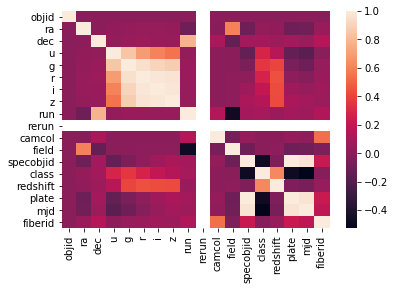

In [39]:
sb.heatmap(datos.corr())

In [40]:
datos.drop(['objid','fiberid','specobjid','mjd'],axis=1,inplace=True)
datos[:10]
#eliminamos las variables que a mi parecer no son relevantes para la predicion

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,0,-0.000009,3306
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,0,-0.000055,323
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,1,0.123111,287
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,0,-0.000111,3306
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0,0.000590,3306
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,0,0.000315,324
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,1,0.100242,287
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,0,0.000315,3306
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,0,0.000089,323
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,1,0.040508,288


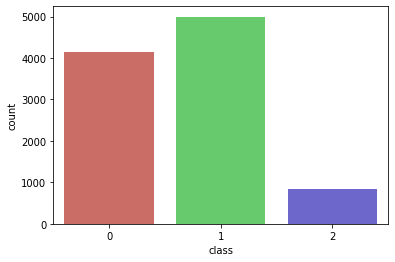

In [41]:
sb.countplot(x='class',data=datos, palette='hls')

Como vemos en el grafico, nos entregan datros muy desbalanceados, 0 y 1 corresponden a estrellas y galaxias respectivamente
y 2 corresponde a los cuasar, esto afecta directamente al algoritmo de prediccion ya que se le hace muy dificil diferenciar una
clase de las otras.


In [42]:
X = datos[["ra","dec","u","g","r","i","z","run","rerun","camcol","field","class","redshift","plate"]]
y = datos[['class']]
y

,class
0,0
1,0
2,1
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

              ra        dec         u         g         r         i         z  \
3555  173.573276  -0.518473  19.49648  19.36368  19.29852  19.11845  19.08193   
4078  167.449438  -0.204307  19.27516  17.93593  17.16087  16.72539  16.46638   
8445   14.399753  14.601499  17.32164  15.94063  15.26906  14.85143  14.59428   
5939  182.372733  -0.860851  19.56933  18.65260  18.45110  18.37256  18.30464   
5583  142.134485  58.409548  19.04761  18.15117  17.83382  17.69068  17.64062   
...          ...        ...       ...       ...       ...       ...       ...   
3341  227.375806  -0.771168  16.99624  15.53884  14.83586  14.42628  14.12664   
4876  179.919959  -0.534320  18.82454  18.26074  17.93938  17.70602  17.46235   
8343  240.641309  52.250872  16.71322  15.25464  14.72938  14.56272  14.50999   
7913  162.119589   0.660777  19.51074  17.67424  16.77590  16.36040  16.06209   
2190   27.475474  13.126662  19.00817  17.13766  16.36818  15.99174  15.71176   

       run  rerun  camcol  

In [44]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, y_train)

C:\Users\patri\miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\patri\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[ 3.93138749e-03 -2.27388840e-02 -1.13039277e+00 -1.31274259e+00
  -5.08933981e-01  5.86627444e-01  1.19917965e+00  1.05030706e-03
   9.16640121e-02 -7.05007508e-02 -5.00189077e-04 -6.02321631e+00
  -1.27787579e+00  7.64644950e-04]
 [-1.08625204e-03  1.09152402e-02  1.56253111e+00  2.99984538e-01
  -6.31626792e-01 -1.55091565e+00 -2.09571861e+00 -4.58803221e-04
   1.30059008e-01  2.15894192e-01 -9.18919045e-04  2.52978151e+00
  -8.89929686e-01 -8.23880069e-04]
 [-2.84513544e-03  1.18236439e-02 -4.32138341e-01  1.01275805e+00
   1.14056077e+00  9.64288207e-01  8.96538954e-01 -5.91503835e-04
  -2.21723021e-01 -1.45393441e-01  1.41910812e-03  3.49343480e+00
   2.16780547e+00  5.92351186e-05]]
intercept: [ 0.00030849  0.00043553 -0.00074403]


In [46]:
y_pred = LogReg.predict(X_test)
y_pred

array([2, 1, 1, ..., 0, 1, 1], dtype=int64)

In [47]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1277,   22,    1],
       [  10, 1430,   13],
       [   0,   23,  224]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.97      0.98      0.98      1453
           2       0.94      0.91      0.92       247

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.98      0.98      0.98      3000

